In [ ]:

batch_size = 100
lr = 0.0001
num_epoch = 5000
number_of_features = 17
hyper_parameter1=128
hyper_parameter2=64
hyper_parameter3=32
hyper_parameter4=16

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from torch.utils.data.dataset import Dataset
from torch.utils.data import random_split, DataLoader
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opt

# GPU OR CPU
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("GPU")
else:
    device = torch.device("cpu")
    print("CPU")

CPU


In [ ]:
class DataSet_Loader(Dataset):

    def __init__(self,data_set_path):
        df = pd.read_excel(data_set_path)
        # print(df.msg_cat.value_counts().sort_values().plot(kind = "barh"))
        # print(df['msg_cat'].value_counts())

        # # preprocceing
        df=df[['QTITTRAN','IANUTRAN','IGARTRANCHC','DHTRAN','CIDGRC','TDECOMP','ACAROMDENACKL_CIDADFEMET','ACAROMDENACKL_YCPTEOM','ACAROMDENACKL_NCPTEPOSIPTOM','ACAROMDENACKL_DHSAIOMADF','ACAROMDENACKL_YPLIMSAIOM','ACAROMDENACKL_YVALIOMNSC','ACAROMDENACKL_YOM','ACAROMDENACKL_IPRSQTITREST','ACAROMDENACKL_CIDITF','ACAROMDENACKL_PLIMSAIOM_QMT','INSTRUMENTID','PTRAN_QMT']]
        df['CIDGRC']=df['CIDGRC'].astype("string")
        df['ACAROMDENACKL_YPLIMSAIOM']=df['ACAROMDENACKL_YPLIMSAIOM'].astype("string")
        df['ACAROMDENACKL_YVALIOMNSC']=df['ACAROMDENACKL_YVALIOMNSC'].astype("string")
        df['ACAROMDENACKL_YOM']=df['ACAROMDENACKL_YOM'].astype("string")
        df['ACAROMDENACKL_CIDITF']=df['ACAROMDENACKL_CIDITF'].astype("string")
        df['INSTRUMENTID']=df['INSTRUMENTID'].astype("string")

        cols = ['CIDGRC' ,'ACAROMDENACKL_YPLIMSAIOM','ACAROMDENACKL_YVALIOMNSC','ACAROMDENACKL_CIDITF','ACAROMDENACKL_YOM','ACAROMDENACKL_NCPTEPOSIPTOM','ACAROMDENACKL_DHSAIOMADF','INSTRUMENTID']
        df[cols] = df[cols].apply(LabelEncoder().fit_transform)

        self.data_array = df.values
        self.x = self.data_array[:, :17]
        self.y = self.data_array[:, 17]

        # normalaized data
        # scaler = preprocessing.StandardScaler().fit(self.x)
        # self.x = scaler.transform(self.x)

        # scaler1 = preprocessing.StandardScaler().fit(self.y)
        # self.y = scaler1.transform(self.y)

        self.x = torch.FloatTensor(self.x)
        self.y = torch.FloatTensor(self.y)

    def __len__(self):
        return len(self.data_array)

    def __getitem__(self, item):
        sample = (self.x[item, :], self.y[item])
        return sample

In [ ]:
dataset_trades = DataSet_Loader("/content/drive/MyDrive/M1.xlsx")
number_of_test = int(len(dataset_trades)*0.3)
number_of_train = len(dataset_trades) - int(len(dataset_trades)*0.3)
train_trade ,test_trade = random_split(dataset=dataset_trades, lengths=[number_of_train,number_of_test])

train_trade_dataloader = DataLoader(dataset=train_trade ,batch_size=batch_size ,shuffle=True)
test_trade_dataloader = DataLoader(dataset=test_trade ,batch_size=batch_size ,shuffle=True)
dataset_trades.x

tensor([[6.0800e+02, 7.0000e+00, 1.0000e+00,  ..., 4.5000e+01, 4.1000e+03,
         2.6200e+02],
        [5.0000e+02, 7.0000e+00, 1.0000e+00,  ..., 4.7000e+01, 4.0000e+03,
         2.6200e+02],
        [3.9200e+02, 7.0000e+00, 1.0000e+00,  ..., 4.8000e+01, 4.5000e+03,
         2.6200e+02],
        ...,
        [2.0000e+03, 7.0000e+00, 1.0000e+00,  ..., 3.4000e+01, 1.6400e+06,
         1.7100e+02],
        [4.3390e+03, 7.0000e+00, 1.0000e+00,  ..., 1.8000e+01, 2.3020e+06,
         2.8200e+02],
        [1.0575e+04, 7.0000e+00, 1.0000e+00,  ..., 5.5000e+01, 5.3600e+04,
         2.5300e+02]])

In [ ]:
dataset_trades.y

tensor([   3900.,    3900.,    3900.,  ..., 1640000., 2301000.,   53600.])

In [ ]:
class Model_Nerual_FL(nn.Module):

    def __init__(self):
        super(Model_Nerual_FL, self).__init__()

        self.layers = nn.Sequential(
        nn.Linear(number_of_features, hyper_parameter1),
        nn.ReLU(),
        nn.Linear(hyper_parameter1, hyper_parameter2),
        nn.ReLU(),
        nn.Linear(hyper_parameter2, hyper_parameter3),
        nn.ReLU(),
        nn.Linear(hyper_parameter3, hyper_parameter4),
        nn.ReLU(),
        nn.Linear(hyper_parameter4,1)
        )

    def forward(self,x):
        return self.layers(x)

In [ ]:
model_Nerual_FL = Model_Nerual_FL().to(device=device)
model_Nerual_FL

Model_Nerual_FL(
  (layers): Sequential(
    (0): Linear(in_features=17, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [ ]:
global_model = Model_Nerual_FL().to(device=device)
optimizer = opt.Adam(global_model.parameters(), lr=lr)
loss_fn = nn.MSELoss()

Epoch [0/5000], Loss: 25863785350420804665344.0000
Epoch [50/5000], Loss: 25836455256082106810368.0000
Epoch [100/5000], Loss: 25834210211667862618112.0000
Epoch [150/5000], Loss: 25832235383231260655616.0000
Epoch [200/5000], Loss: 25829630050846826823680.0000
Epoch [250/5000], Loss: 25827808344797555458048.0000
Epoch [300/5000], Loss: 25825538530585360728064.0000
Epoch [350/5000], Loss: 25823372299164595519488.0000
Epoch [400/5000], Loss: 25821311902335073517568.0000
Epoch [450/5000], Loss: 25818774123945050243072.0000
Epoch [500/5000], Loss: 25816718230715155611648.0000
Epoch [550/5000], Loss: 25814558754693831458816.0000
Epoch [600/5000], Loss: 25812142573493747187712.0000
Epoch [650/5000], Loss: 25810343385442612674560.0000
Epoch [700/5000], Loss: 25808019528034889498624.0000
Epoch [750/5000], Loss: 25805970390204435922944.0000
Epoch [800/5000], Loss: 25803626266598389579776.0000
Epoch [850/5000], Loss: 25801559114369426522112.0000
Epoch [900/5000], Loss: 25799406393747543425024.0

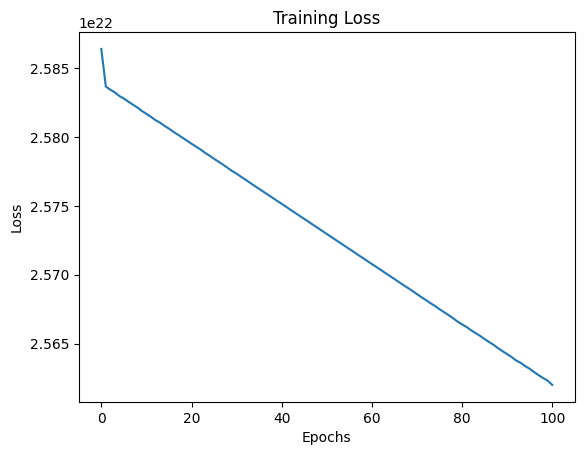

In [ ]:
loss_plot = []

for epoch in range(num_epoch+1):
    for batch_x, batch_y in train_trade_dataloader:
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)

        batch_x, batch_y = batch_x.float(), batch_y.float().reshape((batch_y.shape[0], 1))


        output = global_model(batch_x)
        loss = loss_fn(output,batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch % 50 == 0:
        print("Epoch [%d/%d], Loss: %.4f" % (epoch, num_epoch, loss.item()))
        loss_plot.append(loss.item())


plt.plot(range(len(loss_plot)), np.asarray(loss_plot))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [ ]:

y_test, yhat = list(), list()


model_Nerual_FL.eval()  # Set the model to evaluation mode
total_correct = 0
total_samples = 0
# criterion = nn.BCEWithLogitsLoss()

with torch.no_grad():  # Disable gradient computation for evaluation
    for inputs, targets in test_trade_dataloader:
        inputs = inputs.to(device).float()
        targets = targets.to(device).float()

        outputs = global_model(inputs)
        test_loss = loss_fn(outputs, targets.reshape((targets.shape[0], 1)))
        print(f'Test Loss: {test_loss.item():.4f}')
        print('-------------------------')

Test Loss: 25620507653949691527168.0000
-------------------------
Test Loss: 25620807143324911665152.0000
-------------------------
Test Loss: 25620764359128451645440.0000
-------------------------
Test Loss: 25620590970542797881344.0000
-------------------------
Test Loss: 25620575207944102084608.0000
-------------------------
Test Loss: 25620744092930128478208.0000
-------------------------
Test Loss: 25620786877126588497920.0000
-------------------------
Test Loss: 25620836416722489573376.0000
-------------------------
Test Loss: 25620651769137767383040.0000
-------------------------
Test Loss: 25620728330331432681472.0000
-------------------------
Test Loss: 25620667531736463179776.0000
-------------------------
Test Loss: 25620503150350064156672.0000
-------------------------
Test Loss: 25619838869405027008512.0000
-------------------------


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


df = pd.read_excel("/content/drive/MyDrive/M1.xlsx")

msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

df=df[['QTITTRAN','IANUTRAN','IGARTRANCHC','DHTRAN','CIDGRC','TDECOMP','ACAROMDENACKL_CIDADFEMET','ACAROMDENACKL_YCPTEOM','ACAROMDENACKL_NCPTEPOSIPTOM','ACAROMDENACKL_DHSAIOMADF','ACAROMDENACKL_YPLIMSAIOM','ACAROMDENACKL_YVALIOMNSC','ACAROMDENACKL_YOM','ACAROMDENACKL_IPRSQTITREST','ACAROMDENACKL_CIDITF','ACAROMDENACKL_PLIMSAIOM_QMT','INSTRUMENTID','PTRAN_QMT']]
df['CIDGRC']=df['CIDGRC'].astype("string")
df['ACAROMDENACKL_YPLIMSAIOM']=df['ACAROMDENACKL_YPLIMSAIOM'].astype("string")
df['ACAROMDENACKL_YVALIOMNSC']=df['ACAROMDENACKL_YVALIOMNSC'].astype("string")
df['ACAROMDENACKL_YOM']=df['ACAROMDENACKL_YOM'].astype("string")
df['ACAROMDENACKL_CIDITF']=df['ACAROMDENACKL_CIDITF'].astype("string")
df['INSTRUMENTID']=df['INSTRUMENTID'].astype("string")

cols = ['CIDGRC' ,'ACAROMDENACKL_YPLIMSAIOM','ACAROMDENACKL_YVALIOMNSC','ACAROMDENACKL_CIDITF','ACAROMDENACKL_YOM','ACAROMDENACKL_NCPTEPOSIPTOM','ACAROMDENACKL_DHSAIOMADF','INSTRUMENTID']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

train_x = np.array(df[['QTITTRAN','IANUTRAN','IGARTRANCHC','DHTRAN','CIDGRC','TDECOMP','ACAROMDENACKL_CIDADFEMET','ACAROMDENACKL_YCPTEOM','ACAROMDENACKL_NCPTEPOSIPTOM','ACAROMDENACKL_DHSAIOMADF','ACAROMDENACKL_YPLIMSAIOM','ACAROMDENACKL_YVALIOMNSC','ACAROMDENACKL_YOM','ACAROMDENACKL_IPRSQTITREST','ACAROMDENACKL_CIDITF','ACAROMDENACKL_PLIMSAIOM_QMT','INSTRUMENTID']])
train_y = np.array(df[['PTRAN_QMT']])
reg = LinearRegression().fit(train_x, train_y)
print("score : %.3f" % reg.score(train_x, train_y))
print(reg.coef_[0])
print("intercept : %.3f" % reg.intercept_[0])
print(train_x)
print(train_y)

#----------------------------------------------------------------
test_x = np.array(df[['QTITTRAN','IANUTRAN','IGARTRANCHC','DHTRAN','CIDGRC','TDECOMP','ACAROMDENACKL_CIDADFEMET','ACAROMDENACKL_YCPTEOM','ACAROMDENACKL_NCPTEPOSIPTOM','ACAROMDENACKL_DHSAIOMADF','ACAROMDENACKL_YPLIMSAIOM','ACAROMDENACKL_YVALIOMNSC','ACAROMDENACKL_YOM','ACAROMDENACKL_IPRSQTITREST','ACAROMDENACKL_CIDITF','ACAROMDENACKL_PLIMSAIOM_QMT','INSTRUMENTID']])
test_y = np.array(df[['PTRAN_QMT']])
test_y_ = reg.predict(test_x)
print("r2 score : %.2f" % (r2_score(test_y,test_y_)))


from sklearn.metrics import mean_squared_error

mean_squared_error(test_y, test_y_)

score : 1.000
[-9.14477491e-03  1.83665592e-06  1.00087050e-10  4.45568499e+01
  2.03936409e+03  5.42428324e-11  1.86557068e+00  1.83795029e+02
  4.31143972e-01  1.14014703e+01  1.13686838e-12 -1.85247468e+03
 -1.17491565e+04 -2.38345715e+03  1.43358735e+02  9.96213932e-01
 -1.21933702e+01]
intercept : -901848736153406.500
[[    608       7       1 ...      45    4100     262]
 [    500       7       1 ...      47    4000     262]
 [    392       7       1 ...      48    4500     262]
 ...
 [   2000       7       1 ...      34 1640000     171]
 [   4339       7       1 ...      18 2302000     282]
 [  10575       7       1 ...      55   53600     253]]
[[   3900]
 [   3900]
 [   3900]
 ...
 [1640000]
 [2301000]
 [  53600]]
r2 score : 1.00


4011009904.6473484